In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#import table from tab file
dataframe = pd.read_csv('../data/HAM10000_metadata', delimiter=',')


In [22]:
dataframe.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [23]:
#change endings of image_id to .jpg
dataframe['image_id'] = dataframe['image_id'].apply(lambda x: x + '.jpg')

In [24]:
dataframe.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030.jpg,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661.jpg,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear,vidir_modern


In [25]:
#pool mel,bcc,akiec into skin cancer category in new column dx_binary
dataframe['dx_binary'] = np.where(dataframe['dx'].isin(['mel','bcc','akiec']), 'skin_cancer', 'not_skin_cancer')

In [26]:
dataframe.dx_binary.unique()

array(['not_skin_cancer', 'skin_cancer'], dtype=object)

In [27]:
#impute missing values in age column with mean
dataframe['age'].fillna(dataframe['age'].median(), inplace=True)

In [28]:
dataframe.describe()

,age
count,10015.000000
mean,51.853220
std,16.920833
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [29]:
#show age zero in dataframe
dataframe[dataframe['age'] == 0]

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,dx_binary
117,HAM_0007179,ISIC_0025906.jpg,bkl,histo,0.0,female,back,vidir_modern,not_skin_cancer
118,HAM_0007179,ISIC_0027151.jpg,bkl,histo,0.0,female,back,vidir_modern,not_skin_cancer
865,HAM_0006186,ISIC_0029320.jpg,bkl,consensus,0.0,male,lower extremity,vidir_modern,not_skin_cancer
866,HAM_0006186,ISIC_0029427.jpg,bkl,consensus,0.0,male,lower extremity,vidir_modern,not_skin_cancer
902,HAM_0004543,ISIC_0032170.jpg,bkl,consensus,0.0,female,back,vidir_modern,not_skin_cancer
2388,HAM_0002610,ISIC_0026876.jpg,vasc,consensus,0.0,female,abdomen,vidir_modern,not_skin_cancer
2389,HAM_0002610,ISIC_0030606.jpg,vasc,consensus,0.0,female,abdomen,vidir_modern,not_skin_cancer
2398,HAM_0004542,ISIC_0024402.jpg,vasc,consensus,0.0,female,back,vidir_modern,not_skin_cancer
2399,HAM_0004542,ISIC_0027256.jpg,vasc,consensus,0.0,female,back,vidir_modern,not_skin_cancer
6683,HAM_0003246,ISIC_0029049.jpg,nv,histo,0.0,male,ear,vidir_modern,not_skin_cancer


In [30]:
#show age zero in dataframe
dataframe[dataframe['age'] == 0].count()

lesion_id       39
image_id        39
dx              39
dx_type         39
age             39
sex             39
localization    39
dataset         39
dx_binary       39
dtype: int64

In [31]:
#impute age zero with median
#dataframe['age'].replace(0, dataframe['age'].mean(), inplace=True)

In [32]:
#remove entries with age < 20
#dataframe = dataframe[dataframe['age'] >= 20]

<Axes: xlabel='dx_type', ylabel='Count'>

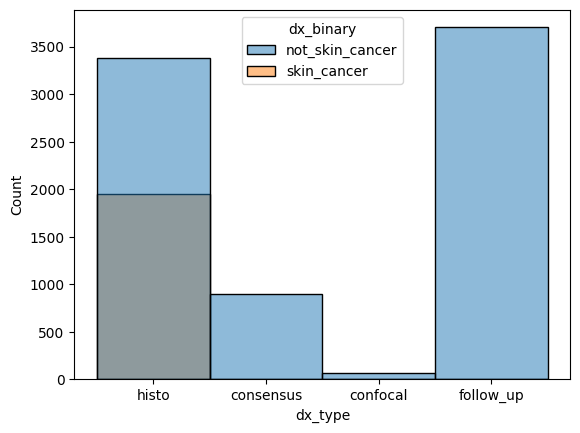

In [40]:
sns.histplot(data=dataframe,x="dx_type" ,hue ='dx_binary')

<Axes: xlabel='dx_type', ylabel='Count'>

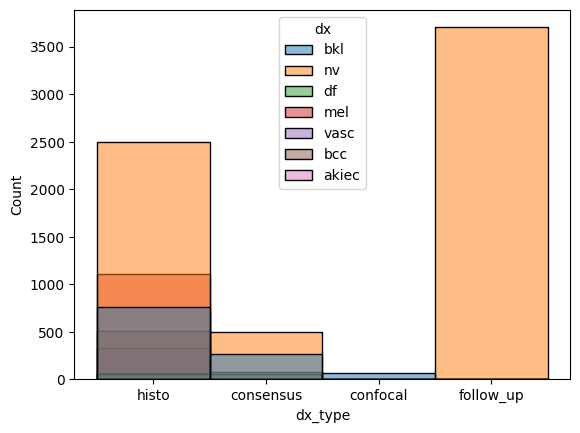

In [42]:
sns.histplot(data=dataframe,x="dx_type" ,hue ='dx')

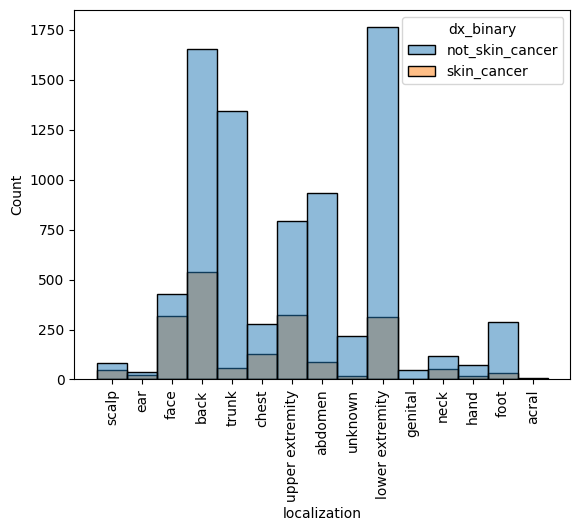

In [47]:
sns.histplot(data=dataframe,x="localization" ,hue ='dx_binary')
plt.xticks(rotation=90)
plt.show()

In [49]:
#save as csv
dataframe.to_csv('../data/processed/Metadata_processed.csv', index=False)